In [31]:
# -------------------- load raw data -------------------

label=[]
raw_image=[]

for line in open('./Homework/train.csv'):
#     line = f.readline()
    line = line.split(',')
#     print(line)
    if not(line[0].isdigit()):
        continue
    label.append(line[0])
    raw_image.append(line[1].split())    

    

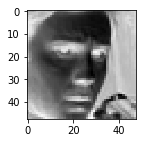

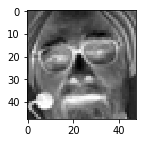

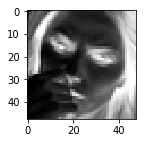

(22000, 48, 48)


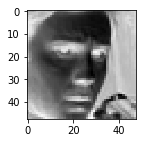

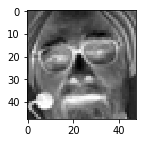

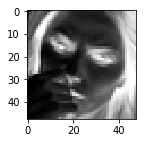

In [13]:
# --------------------- format data ----------------------
import numpy as np
temp = np.array(raw_image).reshape(len(raw_image),48,48).astype(np.int)
for i in range(3):
    plot_image(temp[i])  # print raw image

np.save("trainX", temp)

temp = np.load("trainX.npy")
print(temp.shape)

for i in range(3):
    plot_image(temp[i])  # print reloaded image

temp = np.array(label).reshape(len(label),1).astype(np.int)
print(temp[:10])


np.save("trainY", temp)

temp = np.load("trainY.npy")
print(temp.shape)
print(temp[:10])

# 0: mad, 1:disgust, 2: terrified, 3: happy, 4: sad, 5: suprised, 6: netural

In [8]:
# ---------------- loading format data -----------------

import numpy as np
from keras.utils import np_utils  


trainX = np.load("datasets/trainX_split5.npy")
print(type(trainX[0]), trainX.shape)
trainX = trainX/255
print(trainX[0])

trainY = np.load("datasets/trainY_split5.npy")
print(type(trainY[0]), trainY.shape)
print(trainY[:5])

trainX = trainX.reshape(trainX.shape[0], 48, 48, 1).astype('float32') 

trainY_oneHot = np_utils.to_categorical(trainY)  
print(trainY_oneHot.shape)



<class 'numpy.ndarray'> (17600, 48, 48)
[[0.00027682 0.0004306  0.00056901 ... 0.00129181 0.00116878 0.00079969]
 [0.00033833 0.0004306  0.00059977 ... 0.00073818 0.00118416 0.00138408]
 [0.00038447 0.00032295 0.00084583 ... 0.00067666 0.00118416 0.00204537]
 ...
 [0.00235294 0.00229143 0.00235294 ... 0.00347559 0.0035371  0.00352172]
 [0.00232218 0.00229143 0.00233756 ... 0.00347559 0.0035371  0.00352172]
 [0.00229143 0.00226067 0.00226067 ... 0.00349097 0.0035371  0.00350634]]
<class 'numpy.ndarray'> (17600, 1)
[[2]
 [3]
 [3]
 [6]
 [4]]
(17600, 7)


In [9]:
def get_class_weights(y):
    uni_val, counter = np.unique(y, return_counts=True)
    print(uni_val)
    print(counter)

    return  [float(10000/count) for count in counter]

class_weights=get_class_weights(trainY)
print(class_weights)

[0 1 2 3 4 5 6]
[2450  284 2550 4423 2954 1901 3038]
[4.081632653061225, 35.2112676056338, 3.9215686274509802, 2.2609088853719195, 3.3852403520649967, 5.260389268805891, 3.291639236339697]


In [5]:
# ------------------------shuffle dataset--------------------------

import numpy as np
def union_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]


# trainX, trainY = union_shuffled_copies(trainX, trainY)
# print(trainY[:5])
# trainY_oneHot = np_utils.to_categorical(trainY)  

In [22]:
# -----------------------stratified sampling --------------------------

from sklearn.model_selection import StratifiedShuffleSplit
X = np.array([[10, 2], [30, 4], [10, 20], [3, 40], [30, 40], [1, 20], [300, 4], [3, 400], [100, 2], [300, 40], 
              [31, 4], [11, 2], [3, 41], [31, 41], [1, 21], [311, 4], [3, 411], [11, 21], [311, 41], [31, 411]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

def stratified_sampling(data, label, valid_percent=0.2):
    spliter = StratifiedShuffleSplit(n_splits=int(1/valid_percent), test_size=valid_percent, train_size=1-valid_percent, random_state=0)
    train_index_set, valid_index_set = [], []
    for train_index, valid_index in spliter.split(data, label):
        print("TRAIN:", train_index, len(train_index), "TEST:", valid_index, len(valid_index))
        train_index_set.append(train_index)
        valid_index_set.append(valid_index)
    return train_index_set, valid_index_set

t_ind, v_ind = stratified_sampling(trainX, trainY, valid_percent=0.2)

counter=0
for tt, vv in zip(t_ind, v_ind):
    counter+=1
    np.save("trainX_split{}".format(counter), trainX[tt])
    np.save("validX_split{}".format(counter), trainX[vv])
    np.save("trainY_split{}".format(counter), trainY[tt])
    np.save("validY_split{}".format(counter), trainY[vv])
    

TRAIN: [ 5667  3986 20006 ... 19371  9666 19362] 17600 TEST: [ 3391 10811  7669 ...  7051  4723  7756] 4400
TRAIN: [ 4707  2570  1397 ... 15023  2004 21316] 17600 TEST: [ 3549 18532  4237 ... 20005  6186  9844] 4400
TRAIN: [12111 21798  7860 ...  2119  9278  1968] 17600 TEST: [19264  1555 15213 ...  7141 18977 14496] 4400
TRAIN: [20830 16239 15366 ... 12882 19215 21811] 17600 TEST: [18250 10376 20387 ...  4351  8704  3816] 4400
TRAIN: [16788 21019  1074 ...  6093  8681  4932] 17600 TEST: [ 8851  7844  4403 ... 10306 10978  2373] 4400


[[0.07058824 0.10980392 0.14509804 ... 0.32941176 0.29803922 0.20392157]
 [0.08627451 0.10980392 0.15294118 ... 0.18823529 0.30196078 0.35294118]
 [0.09803922 0.08235294 0.21568627 ... 0.17254902 0.30196078 0.52156863]
 ...
 [0.6        0.58431373 0.6        ... 0.88627451 0.90196078 0.89803922]
 [0.59215686 0.58431373 0.59607843 ... 0.88627451 0.90196078 0.89803922]
 [0.58431373 0.57647059 0.57647059 ... 0.89019608 0.90196078 0.89411765]]
<class 'numpy.ndarray'> (17600, 48, 48)
(17600, 48, 48) [[ 27.  48.  91. ...  76.  37.  17.]
 [ 34.  60. 114. ...  78.  37.  18.]
 [ 44.  83. 143. ...  59.  26.  22.]
 ...
 [208. 230. 245. ... 255. 255. 230.]
 [205. 231. 248. ... 255. 255. 229.]
 [201. 228. 251. ... 255. 255. 228.]]
(17600, 1) [[2]
 [3]
 [3]
 [6]
 [4]]
(17600, 7)


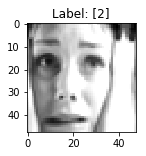

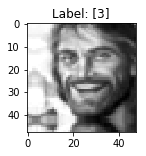

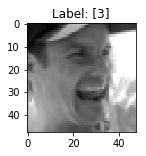

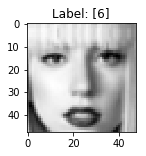

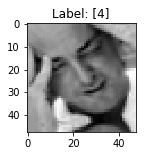

In [26]:
# ------------------------ image data augmentation --------------------------
trainX = np.load("datasets/trainX_split5.npy")
print(trainX[0])
print(type(trainX[0]), trainX.shape)

trainX = trainX.reshape(trainX.shape[0], 48, 48, 1).astype('float32') 


from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# datagen = ImageDataGenerator(fill_mode='constant', rotation_range=20)
# datagen = ImageDataGenerator(fill_mode='constant', shear_range=20)
# datagen = ImageDataGenerator(fill_mode='constant', zoom_range=0.3)
datagen =  ImageDataGenerator(rotation_range=15,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.01,
                               zoom_range=[0.9, 1.1],
                               horizontal_flip=True,
                               vertical_flip=False,
                               fill_mode='reflect',                               
                               brightness_range=[0.75, 1.25])
datagen.fit(trainX)
counter=0
trainX_aug = []
trainY_aug = []
generate_amount=len(trainX)

for bx, by in datagen.flow(trainX, trainY, batch_size=1, shuffle=False):
    counter+=1
    if counter>generate_amount: break

    bx=np.squeeze(bx, axis=3)
#     bx=np.squeeze(bx, axis=0)
    trainX_aug.append(bx)
    trainY_aug.append(by)

trainX_aug = np.concatenate(trainX_aug, axis=0).reshape(generate_amount, 48, 48)
print(trainX_aug.shape, trainX_aug[0])
# for t in temp:
#     plot_image(t)
trainY_aug = np.vstack(trainY_aug)
print(trainY_aug.shape, trainY_aug[:5])

np.save("datasets/trainX_split_mix5", trainX_aug)

trainY_oneHot_aug = np_utils.to_categorical(trainY_aug)      
print(trainY_oneHot_aug.shape)
for i in range(5):
    plot_image(trainX_aug[i].reshape(48, 48), trainY_aug[i])


(17600, 48, 48)
(17600, 48, 48)


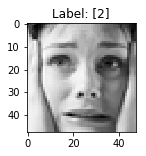

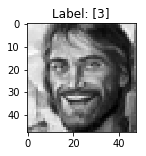

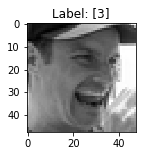

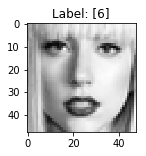

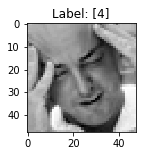

In [109]:
# -------------------- horizontal/vertical flip ------------------------

trainX = np.load("datasets/trainX_split5.npy")
print(trainX.shape)
trainY = np.load("datasets/trainY_split5.npy")

trainX_aug = trainX[:, :, ::-1]  # horizontal, vertical for axis=1
trainY_aug = []


trainX_aug = np.concatenate(trainX_aug, axis=0).reshape(generate_amount, 48, 48).astype('float32') 
print(trainX_aug.shape)
# trainY_aug = np.vstack(trainY_aug)
# print(trainY_aug.shape, trainY_aug[:5])

np.save("datasets/trainX_split_hflip5", trainX_aug)

# trainY_oneHot_aug = np_utils.to_categorical(trainY_aug)      
# print(trainY_oneHot_aug.shape)
for i in range(5):
    plot_image(trainX_aug[i].reshape(48, 48), trainY[i])



[[2]
 [3]
 [3]
 [6]
 [4]]
(17600, 48, 48) [[0.07058824 0.10980392 0.14509804 ... 0.32941176 0.29803922 0.20392157]
 [0.08627451 0.10980392 0.15294118 ... 0.18823529 0.30196078 0.35294118]
 [0.09803922 0.08235294 0.21568627 ... 0.17254902 0.30196078 0.52156863]
 ...
 [0.6        0.58431373 0.6        ... 0.88627451 0.90196078 0.89803922]
 [0.59215686 0.58431373 0.59607843 ... 0.88627451 0.90196078 0.89803922]
 [0.58431373 0.57647059 0.57647059 ... 0.89019608 0.90196078 0.89411765]]


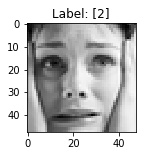

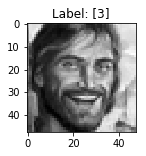

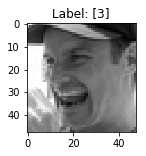

(17600, 48, 48) [[0.20392157 0.29803923 0.32941177 ... 0.14509805 0.10980392 0.07058824]
 [0.3529412  0.3019608  0.1882353  ... 0.15294118 0.10980392 0.08627451]
 [0.52156866 0.3019608  0.17254902 ... 0.21568628 0.08235294 0.09803922]
 ...
 [0.8980392  0.9019608  0.8862745  ... 0.6        0.58431375 0.6       ]
 [0.8980392  0.9019608  0.8862745  ... 0.59607846 0.58431375 0.5921569 ]
 [0.89411765 0.9019608  0.8901961  ... 0.5764706  0.5764706  0.58431375]]


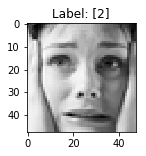

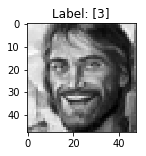

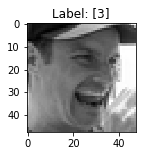

(17600, 48, 48) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


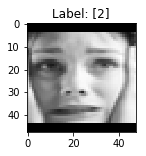

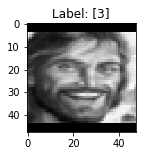

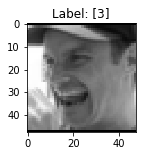

(17600, 48, 48) [[0.16153963 0.22809455 0.41478157 ... 0.         0.         0.        ]
 [0.18618234 0.2960376  0.49603865 ... 0.         0.         0.        ]
 [0.18997812 0.3495406  0.545517   ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.8957737  0.9042681  0.8969535 ]
 [0.         0.         0.         ... 0.89186406 0.9010799  0.8959091 ]
 [0.         0.         0.         ... 0.88946974 0.89903414 0.89388406]]


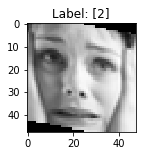

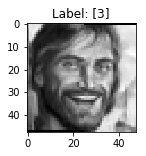

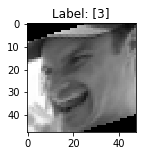

(17600, 48, 48) [[0.         0.08819781 0.11748404 ... 0.         0.         0.        ]
 [0.         0.09398194 0.11335035 ... 0.17016743 0.29082978 0.28793108]
 [0.         0.10415463 0.10261806 ... 0.10290465 0.21070404 0.32327732]
 ...
 [0.58704454 0.5932177  0.62680155 ... 0.8959518  0.8964024  0.        ]
 [0.579963   0.5800908  0.61039233 ... 0.89747727 0.89916235 0.        ]
 [0.         0.         0.         ... 0.8982985  0.89826405 0.        ]]


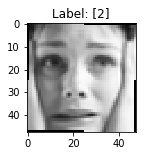

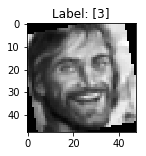

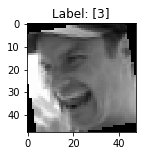

In [11]:
from keras.utils import np_utils  

trainY = np.load("datasets/trainY_split5.npy")
print(trainY[:5])
trainY_oneHot = np_utils.to_categorical(trainY)  

trainX=np.load("datasets/trainX_split5.npy")
print(trainX.shape, trainX[0])

for i in range(3):            
    plot_image(trainX[i].reshape(48, 48), trainY[i])


# trainY_oneHot_aug = np_utils.to_categorical(trainY_aug)      
# print(trainY_oneHot_aug.shape)
trainX_aug1=np.load("datasets/trainX_split_hflip5.npy")
print(trainX_aug1.shape, trainX_aug1[0])
for i in range(3):
    plot_image(trainX_aug1[i].reshape(48, 48), trainY[i])

trainX_aug2=np.load("datasets/trainX_split_zoom5.npy")
print(trainX_aug2.shape, trainX_aug2[0])
for i in range(3):
    plot_image(trainX_aug2[i].reshape(48, 48), trainY[i])

trainX_aug3=np.load("datasets/trainX_split_shear5.npy")
print(trainX_aug3.shape, trainX_aug3[0])
for i in range(3):
    plot_image(trainX_aug3[i].reshape(48, 48), trainY[i])

trainX_aug4=np.load("datasets/trainX_split_rotate5.npy")
print(trainX_aug4.shape, trainX_aug4[0])
for i in range(3):
    plot_image(trainX_aug4[i].reshape(48, 48), trainY[i])

    
trainX_aug1 = trainX_aug1.reshape(trainX_aug1.shape[0], 48, 48, 1).astype('float32')     
trainX_aug2 = trainX_aug2.reshape(trainX_aug2.shape[0], 48, 48, 1).astype('float32')     
trainX_aug3 = trainX_aug3.reshape(trainX_aug3.shape[0], 48, 48, 1).astype('float32')     
trainX_aug4 = trainX_aug4.reshape(trainX_aug4.shape[0], 48, 48, 1).astype('float32')     
trainX = trainX.reshape(trainX.shape[0], 48, 48, 1).astype('float32')     

In [5]:
# ------------------------ plotting function --------------------------

%matplotlib inline

import os  
import matplotlib.pyplot as plt  

def plot_image(image, label=""):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)
    plt.title("Label: {}".format(label))
    plt.imshow(image, cmap='gray')  
    plt.show()  



KeyboardInterrupt: 

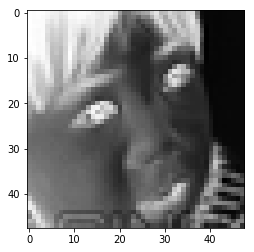

In [11]:
# ------------------------save array to image--------------------------

for ind in range(len(trainX)):
    plt.imshow(trainX[ind], cmap='binary')  
    plt.savefig("./images/sample_{}".format(str(ind)))

In [12]:
from keras.models import Sequential  
from keras.layers import Dense, Dropout, Flatten, Activation 
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization  
from keras import regularizers
    
model = Sequential()  
# Create CN layer 1
model.add(Conv2D(filters=16,  
                 kernel_size=(3,3),  
                 padding='same',  
                 input_shape=(48, 48, 1),
#                  kernel_initializer='he_normal', bias_initializer='zeros', 
#                  kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  

model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=16,  
                 kernel_size=(3,3),  
                 padding='same',
#                 kernel_initializer='he_normal', bias_initializer='zeros', 
#                 kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  

model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
# Add Dropout layer 1 
model.add(Dropout(0.25))

  
# Create CN layer 2
model.add(Conv2D(filters=32,  
                kernel_size=(3,3),  
                padding='same',
#                 kernel_initializer='he_normal', bias_initializer='zeros', 
#                 kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  

model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=32,  
                kernel_size=(3,3),  
                padding='same',
#                 kernel_initializer='he_normal', bias_initializer='zeros', 
#                 kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  

model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))  
# Add Dropout layer 2 
model.add(Dropout(0.25))

# Create CN layer 3 
model.add(Conv2D(filters=64,  
                kernel_size=(3,3),  
                padding='same',
#                 kernel_initializer='he_normal', bias_initializer='zeros', 
#                 kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  

model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=64,  
                kernel_size=(3,3),  
                padding='same',
#                 kernel_initializer='he_normal', bias_initializer='zeros', 
#                 kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  

model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
# Create Max-Pool 3  
model.add(MaxPooling2D(pool_size=(2,2)))  
# Add Dropout layer 3
model.add(Dropout(0.25))


model.add(Flatten())  

model.add(Dense(64, activation='relu'))  
model.add(Dropout(0.5))  
'''
model.add(Conv2D(filters=128,  
                kernel_size=(1,1),  
                padding='same',
#                 kernel_initializer='he_normal', bias_initializer='zeros', 
#                 kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.5))

model.add(Flatten())  
'''
model.add(Dense(7, activation='softmax'))  

model.summary()  
print("")  



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 48, 48, 16)        160       
_________________________________________________________________
activation_7 (Activation)    (None, 48, 48, 16)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 16)        2320      
_________________________________________________________________
activation_8 (Activation)    (None, 48, 48, 16)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 16)        0         
__________

In [33]:
# ------------------------ model training --------------------------

from keras import optimizers

# adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=10e-8, decay=0.0, amsgrad=False)
# 定義訓練方式  
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

# 開始訓練  
train_history = model.fit(x=trainX, y=trainY_oneHot, validation_split=0.2, class_weight=class_weights,
                          epochs=50, batch_size=100, verbose=2)  

Train on 14080 samples, validate on 3520 samples
Epoch 1/50
 - 232s - loss: 1.9562 - acc: 0.2340 - val_loss: 1.7739 - val_acc: 0.2545
Epoch 2/50
 - 236s - loss: 1.7949 - acc: 0.2580 - val_loss: 1.7383 - val_acc: 0.2594
Epoch 3/50
 - 236s - loss: 1.7207 - acc: 0.2928 - val_loss: 1.6156 - val_acc: 0.3659
Epoch 4/50
 - 242s - loss: 1.6687 - acc: 0.3235 - val_loss: 1.5981 - val_acc: 0.3932
Epoch 5/50
 - 241s - loss: 1.6278 - acc: 0.3393 - val_loss: 1.5575 - val_acc: 0.4048
Epoch 6/50
 - 247s - loss: 1.5926 - acc: 0.3602 - val_loss: 1.5970 - val_acc: 0.3969
Epoch 7/50
 - 234s - loss: 1.5649 - acc: 0.3755 - val_loss: 1.5021 - val_acc: 0.4222
Epoch 8/50
 - 238s - loss: 1.5166 - acc: 0.3965 - val_loss: 1.4110 - val_acc: 0.4591
Epoch 9/50
 - 241s - loss: 1.4866 - acc: 0.4104 - val_loss: 1.3821 - val_acc: 0.4659
Epoch 10/50
 - 239s - loss: 1.4696 - acc: 0.4219 - val_loss: 1.3911 - val_acc: 0.4520
Epoch 11/50
 - 236s - loss: 1.4439 - acc: 0.4383 - val_loss: 1.3673 - val_acc: 0.4636
Epoch 12/50
 -

KeyboardInterrupt: 

In [13]:
# ------------------------ augmentation testing--------------------------

from keras import optimizers


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
# trainX_aug = trainX_aug.reshape(trainX_aug.shape[0], 48, 48, 1).astype('float32') 
# print(trainX.shape, trainX_aug.shape)
tempX = np.vstack((trainX, trainX_aug1, trainX_aug2, trainX_aug3, trainX_aug4))
tempY_oneHot = np.vstack((trainY_oneHot, trainY_oneHot, trainY_oneHot, trainY_oneHot, trainY_oneHot))
print(tempX.shape, tempY_oneHot.shape)
train_history = model.fit(x=tempX, y=tempY_oneHot, validation_split=0.2, class_weight=class_weights,
                          epochs=50, batch_size=100, verbose=2)



(88000, 48, 48, 1) (88000, 7)
Train on 70400 samples, validate on 17600 samples
Epoch 1/50
 - 1190s - loss: 1.7817 - acc: 0.2683 - val_loss: 1.6593 - val_acc: 0.3561
Epoch 2/50
 - 1183s - loss: 1.6358 - acc: 0.3316 - val_loss: 1.4913 - val_acc: 0.4013
Epoch 3/50
 - 1160s - loss: 1.5577 - acc: 0.3619 - val_loss: 1.4333 - val_acc: 0.4288
Epoch 4/50
 - 1137s - loss: 1.5043 - acc: 0.3888 - val_loss: 1.4342 - val_acc: 0.4264
Epoch 5/50
 - 1200s - loss: 1.4681 - acc: 0.4078 - val_loss: 1.3484 - val_acc: 0.4552
Epoch 6/50
 - 1164s - loss: 1.4317 - acc: 0.4263 - val_loss: 1.3551 - val_acc: 0.4578
Epoch 7/50
 - 1111s - loss: 1.3881 - acc: 0.4494 - val_loss: 1.2885 - val_acc: 0.5031
Epoch 8/50
 - 1116s - loss: 1.3284 - acc: 0.4767 - val_loss: 1.1949 - val_acc: 0.5421
Epoch 9/50
 - 1126s - loss: 1.2985 - acc: 0.4937 - val_loss: 1.2829 - val_acc: 0.5122
Epoch 10/50
 - 1113s - loss: 1.2685 - acc: 0.5055 - val_loss: 1.1763 - val_acc: 0.5610
Epoch 11/50
 - 1117s - loss: 1.2378 - acc: 0.5223 - val_los

In [24]:

validX= np.load("datasets/validX_split5.npy")
validX = validX.reshape(validX.shape[0], 48, 48, 1).astype('float32')     
# print(type(trainX[0]), trainX.shape)
# print(type(validX[0]), validX.shape)
# trainX = trainX/255
# print(trainX[0])

validY = np.load("datasets/validY_split5.npy")
validY = np_utils.to_categorical(validY)  
print(type(trainY[0]), trainY.shape)
print(type(validY[0]), validY.shape)
loss, accuracy = model.evaluate(x=validX, y=validY, batch_size=100, verbose=1)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

In [19]:
import h5py
from keras.models import load_model, save_model
model1.save('models/09191724_dataAugAll_model5.h5')
validY_onehot = np_utils.to_categorical(validY)  
# print(type(trainY[0]), trainY.shape)
# print(type(validY[0]), validY.shape)

# loss, accuracy = model.evaluate(x=validX, y=validY_onehot, batch_size=100, verbose=1)
# print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

In [18]:
import h5py
from keras.models import load_model, save_model
# model1.save('models/09191346_dataAugAll_model5.h5')

# model = load_model('models/09191346_dataAugAll_model5.h5')
prediction_prob = model.predict(validX[:100], batch_size=None, verbose=0, steps=None)
prediction = []

for a, b in zip(validY[:100], prediction_prob):
    format_b = np.round((b-np.min(b))/(np.max(b)-np.min(b)), 2)
#     print(a, format_b)
    prediction.append(np.argmax(b))
# print(prediction)
from sklearn.metrics import confusion_matrix
confusion_matrix(validY[:100], prediction)

In [4]:
model = load_model('models/09191346_dataAugAll_model5.h5')
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# train_history = model1.fit(x=tempX, y=tempY_oneHot, validation_split=0.2, class_weight=class_weights,
#                           epochs=10, batch_size=100, verbose=2)  